# Очистка данных

In [1]:
# импорт пакетов
import pandas as pd
import random

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r"datasets/gender_classification.csv")
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [3]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [4]:
df.shape

(5001, 8)

In [5]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['long_hair' 'forehead_width_cm' 'forehead_height_cm' 'nose_wide'
 'nose_long' 'lips_thin' 'distance_nose_to_lip_long']


In [6]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['gender']


## Разброс

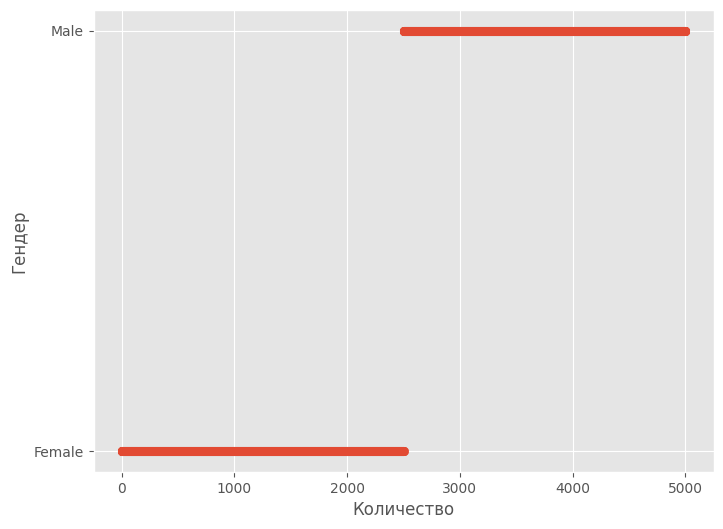

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.gender.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Гендер', fontsize=12)
plt.show()

## Проверка отсутствующих данных

In [9]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


В некоторых столбцах можно увидеть минимальное значение равное нулю, что говорит об отсутсвии данных

## Процентный список пропущенных данных

In [11]:
#считаем процент пропущенных данных
(df.isnull().sum() + (df == 0).sum()) * 100 / df.shape[0]

long_hair                    13.037393
forehead_width_cm             0.000000
forehead_height_cm            0.000000
nose_wide                    50.609878
nose_long                    49.210158
lips_thin                    50.689862
distance_nose_to_lip_long    50.109978
gender                        0.000000
dtype: float64

Присутствуют пропущенные данные

## Удаление по списку

In [38]:
df_age = df['nose_wide'].replace(random.randint(0, 0), np.NaN)
df_corrupt = df
df_corrupt['nose_wide'] = df_age
df_corrupt

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1.0,0,1,1,1
1,1.0,14.0,5.4,NaN,0,1,0,0
2,1.0,11.8,6.3,1.0,1,1,1,1
3,1.0,14.4,6.1,NaN,1,1,1,1
4,1.0,13.5,5.9,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,NaN,0,0,0,0
4997,1.0,11.9,5.4,NaN,0,0,0,0
4998,1.0,12.9,5.7,NaN,0,0,0,0
4999,1.0,13.2,6.2,NaN,0,0,0,0


In [39]:
df_corrupt.dtypes

long_hair                    float64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                    float64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int32
dtype: object

In [40]:
df_corrupt.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.0,5001.000000,5001.000000,2470.0,5001.000000,5001.000000,5001.000000,5001.00000
mean,1.0,13.181484,5.946311,1.0,0.507898,0.493101,0.498900,0.49990
std,0.0,1.107128,0.541268,0.0,0.499988,0.500002,0.500049,0.50005
min,1.0,11.400000,5.100000,1.0,0.000000,0.000000,0.000000,0.00000
25%,1.0,12.200000,5.500000,1.0,0.000000,0.000000,0.000000,0.00000
50%,1.0,13.100000,5.900000,1.0,1.000000,0.000000,0.000000,0.00000
75%,1.0,14.000000,6.400000,1.0,1.000000,1.000000,1.000000,1.00000
max,1.0,15.500000,7.100000,1.0,1.000000,1.000000,1.000000,1.00000


Процент вычисления пропущенных значений:

In [41]:
df_corrupt.isnull().sum() * 100 / df.shape[0]

long_hair                     0.000000
forehead_width_cm             0.000000
forehead_height_cm            0.000000
nose_wide                    50.609878
nose_long                     0.000000
lips_thin                     0.000000
distance_nose_to_lip_long     0.000000
gender                        0.000000
dtype: float64

In [20]:
df_del = df_corrupt.dropna()
df_del

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1,0,1,1,Male
4,1.0,13.5,5.9,0,0,0,0,Female
5,1.0,13.0,6.8,1,1,1,1,Male
6,1.0,15.3,6.2,1,1,1,0,Male
8,1.0,11.9,5.4,1,0,1,1,Female
...,...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,0,0,0,0,Female
4997,1.0,11.9,5.4,0,0,0,0,Female
4998,1.0,12.9,5.7,0,0,0,0,Female
4999,1.0,13.2,6.2,0,0,0,0,Female


In [21]:
df_del.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,4349.0,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000,4349.000000
mean,1.0,13.178685,5.942699,0.494137,0.510692,0.495286,0.493907
std,0.0,1.104606,0.542181,0.500023,0.499943,0.500035,0.500020
min,1.0,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.0,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.0,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.0,14.000000,6.300000,1.000000,1.000000,1.000000,1.000000
max,1.0,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


## Отбрасывание признаков

In [45]:
cols_to_drop = ['nose_wide ']
df_less = df_del.drop(cols_to_drop, axis=1)
df_less

,long_hair,forehead_width_cm,forehead_height_cm,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,0,1,1,Male
4,1.0,13.5,5.9,0,0,0,Female
5,1.0,13.0,6.8,1,1,1,Male
6,1.0,15.3,6.2,1,1,0,Male
8,1.0,11.9,5.4,0,1,1,Female
...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,0,0,0,Female
4997,1.0,11.9,5.4,0,0,0,Female
4998,1.0,12.9,5.7,0,0,0,Female
4999,1.0,13.2,6.2,0,0,0,Female


## Внесение недостающих значений

In [48]:
med = df_corrupt['nose_wide'].median()
print(med)
df_fill = df_corrupt['nose_wide'].fillna(med)
df_f = df_corrupt
df_f['nose_wide'] = df_fill
df_f

0.0


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1.0,0,1,1,1
1,1.0,14.0,5.4,1.0,0,1,0,0
2,1.0,11.8,6.3,1.0,1,1,1,1
3,1.0,14.4,6.1,1.0,1,1,1,1
4,1.0,13.5,5.9,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,1.0,0,0,0,0
4997,1.0,11.9,5.4,1.0,0,0,0,0
4998,1.0,12.9,5.7,1.0,0,0,0,0
4999,1.0,13.2,6.2,1.0,0,0,0,0


In [49]:
df_f.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.0,5001.000000,5001.000000,5001.0,5001.000000,5001.000000,5001.000000,5001.00000
mean,1.0,13.181484,5.946311,1.0,0.507898,0.493101,0.498900,0.49990
std,0.0,1.107128,0.541268,0.0,0.499988,0.500002,0.500049,0.50005
min,1.0,11.400000,5.100000,1.0,0.000000,0.000000,0.000000,0.00000
25%,1.0,12.200000,5.500000,1.0,0.000000,0.000000,0.000000,0.00000
50%,1.0,13.100000,5.900000,1.0,1.000000,0.000000,0.000000,0.00000
75%,1.0,14.000000,6.400000,1.0,1.000000,1.000000,1.000000,1.00000
max,1.0,15.500000,7.100000,1.0,1.000000,1.000000,1.000000,1.00000


## Одномерное восстановление признаков

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_corrupt['gender'] = np.where(df_corrupt['gender'] == "Male", 1, 0)
imputer = imputer.fit(df_corrupt)
df_fill1 = pd.DataFrame(imputer.transform(df_corrupt.loc[:,:]), columns = df_corrupt.columns)
df_fill1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1.0,0.0,1.0,1.0,0.0
1,1.0,14.0,5.4,1.0,0.0,1.0,0.0,0.0
2,1.0,11.8,6.3,1.0,1.0,1.0,1.0,0.0
3,1.0,14.4,6.1,1.0,1.0,1.0,1.0,0.0
4,1.0,13.5,5.9,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,1.0,0.0,0.0,0.0,0.0
4997,1.0,11.9,5.4,1.0,0.0,0.0,0.0,0.0
4998,1.0,12.9,5.7,1.0,0.0,0.0,0.0,0.0
4999,1.0,13.2,6.2,1.0,0.0,0.0,0.0,0.0


In [51]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.0,5001.000000,5001.000000,5001.0,5001.000000,5001.000000,5001.000000,5001.0
mean,1.0,13.181484,5.946311,1.0,0.507898,0.493101,0.498900,0.0
std,0.0,1.107128,0.541268,0.0,0.499988,0.500002,0.500049,0.0
min,1.0,11.400000,5.100000,1.0,0.000000,0.000000,0.000000,0.0
25%,1.0,12.200000,5.500000,1.0,0.000000,0.000000,0.000000,0.0
50%,1.0,13.100000,5.900000,1.0,1.000000,0.000000,0.000000,0.0
75%,1.0,14.000000,6.400000,1.0,1.000000,1.000000,1.000000,0.0
max,1.0,15.500000,7.100000,1.0,1.000000,1.000000,1.000000,0.0


## Многомерное восстановление признаков

In [58]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp = imp.fit(df_corrupt)
df_fill1 = pd.DataFrame(imp.transform(df_corrupt.loc[:,:]), columns = df_fill1.columns)
df_fill1.round(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1.0,0.0,1.0,1.0,0.0
1,1.0,14.0,5.4,1.0,0.0,1.0,0.0,0.0
2,1.0,11.8,6.3,1.0,1.0,1.0,1.0,0.0
3,1.0,14.4,6.1,1.0,1.0,1.0,1.0,0.0
4,1.0,13.5,5.9,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,1.0,0.0,0.0,0.0,0.0
4997,1.0,11.9,5.4,1.0,0.0,0.0,0.0,0.0
4998,1.0,12.9,5.7,1.0,0.0,0.0,0.0,0.0
4999,1.0,13.2,6.2,1.0,0.0,0.0,0.0,0.0


In [59]:
df_fill1.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.0,5001.000000,5001.000000,5001.0,5001.000000,5001.000000,5001.000000,5001.0
mean,1.0,13.181484,5.946311,1.0,0.507898,0.493101,0.498900,0.0
std,0.0,1.107128,0.541268,0.0,0.499988,0.500002,0.500049,0.0
min,1.0,11.400000,5.100000,1.0,0.000000,0.000000,0.000000,0.0
25%,1.0,12.200000,5.500000,1.0,0.000000,0.000000,0.000000,0.0
50%,1.0,13.100000,5.900000,1.0,1.000000,0.000000,0.000000,0.0
75%,1.0,14.000000,6.400000,1.0,1.000000,1.000000,1.000000,0.0
max,1.0,15.500000,7.100000,1.0,1.000000,1.000000,1.000000,0.0


## Выбросы

<AxesSubplot: >

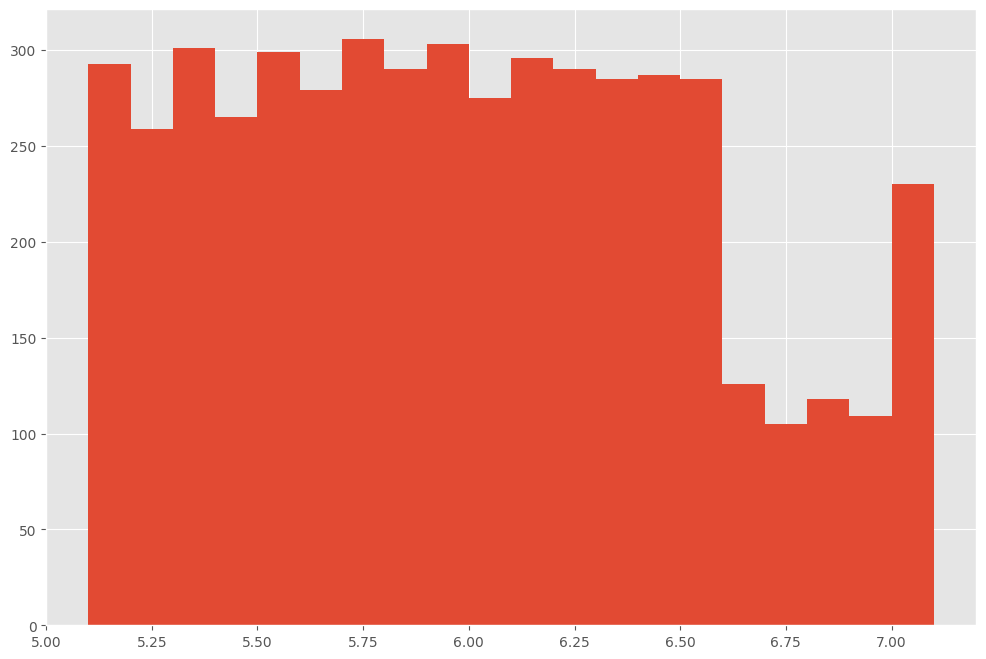

In [60]:
df_fill1['forehead_height_cm'].hist(bins=20)

<AxesSubplot: >

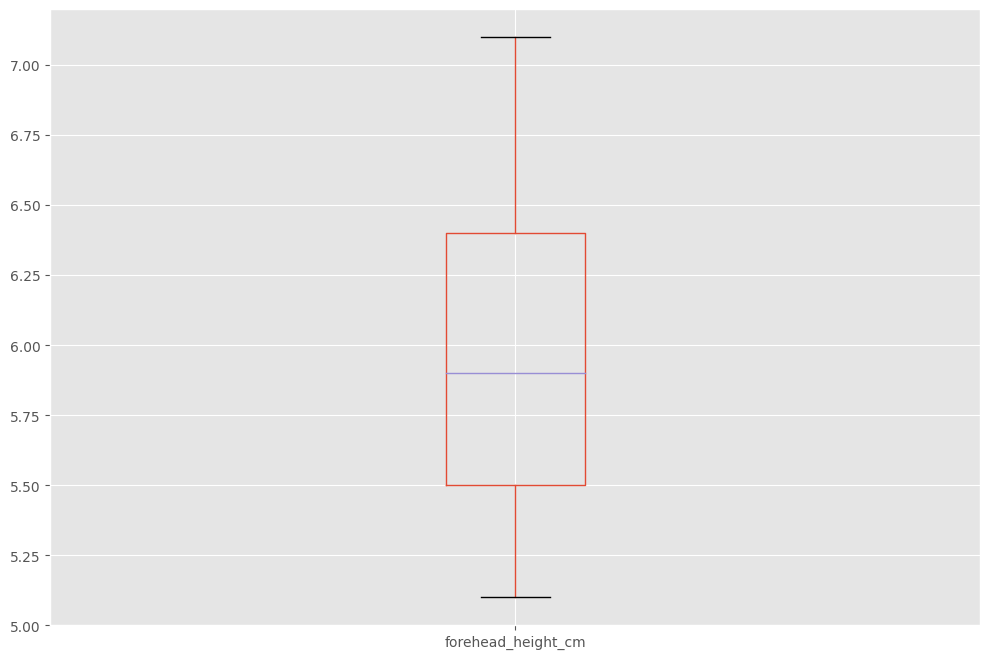

In [61]:
df_fill1.boxplot(column=['forehead_height_cm'])

Выбросы отсутствуют

## Неинформативные признаки

In [62]:
num_rows = len(df_corrupt.index)
low_information_cols = []

for col in df_corrupt.columns:
    cnts = df_corrupt[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
low_information_cols

100.0
long_hair: 100.00000%
1.0    5001
Name: long_hair, dtype: int64

3.3593281343731256
6.11877624475105
100.0
nose_wide: 100.00000%
1.0    5001
Name: nose_wide, dtype: int64

50.78984203159368
50.68986202759448
50.109978004399125
100.0
gender: 100.00000%
0    5001
Name: gender, dtype: int64



['long_hair', 'nose_wide', 'gender']

Строки с низкой информативностью отсутствуют, тк выведенные колонки являются бинарными признаками

## Дубликаты записей

In [63]:
key = ['forehead_height_cm', 'nose_wide', 'nose_long']
df_new_del = df_del
df_new_del.fillna(-999).groupby(key)['gender'].count().sort_values(ascending=False).head(20)

df_dedupped2 = df_new_del.drop_duplicates(subset=key)

print(df_new_del.shape)
print(df_dedupped2.shape)
df_dedupped2

(4349, 8)
(83, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,11.8,6.1,1,0,1,1,Male
4,1.0,13.5,5.9,0,0,0,0,Female
5,1.0,13.0,6.8,1,1,1,1,Male
6,1.0,15.3,6.2,1,1,1,0,Male
8,1.0,11.9,5.4,1,0,1,1,Female
...,...,...,...,...,...,...,...,...
789,1.0,13.2,7.0,1,0,1,0,Male
1039,1.0,13.4,6.9,0,0,1,1,Male
1069,1.0,12.2,6.5,1,0,1,1,Male
2091,1.0,12.4,6.8,0,0,1,1,Male


Дубликаты удалены.